# COMPETICION KAGGLE

**AUTORES**

* Alicia García Pérez
* Cristian Fernández Martínez

**DESCRIPCION**

Se trata de diseñar un algoritmo que prediga los 1000 enlaces ausentes para una red social de miembros de una universidad española. 


In [69]:
#Imports
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Number of Nodes: 1133, Number of Edges: 4451


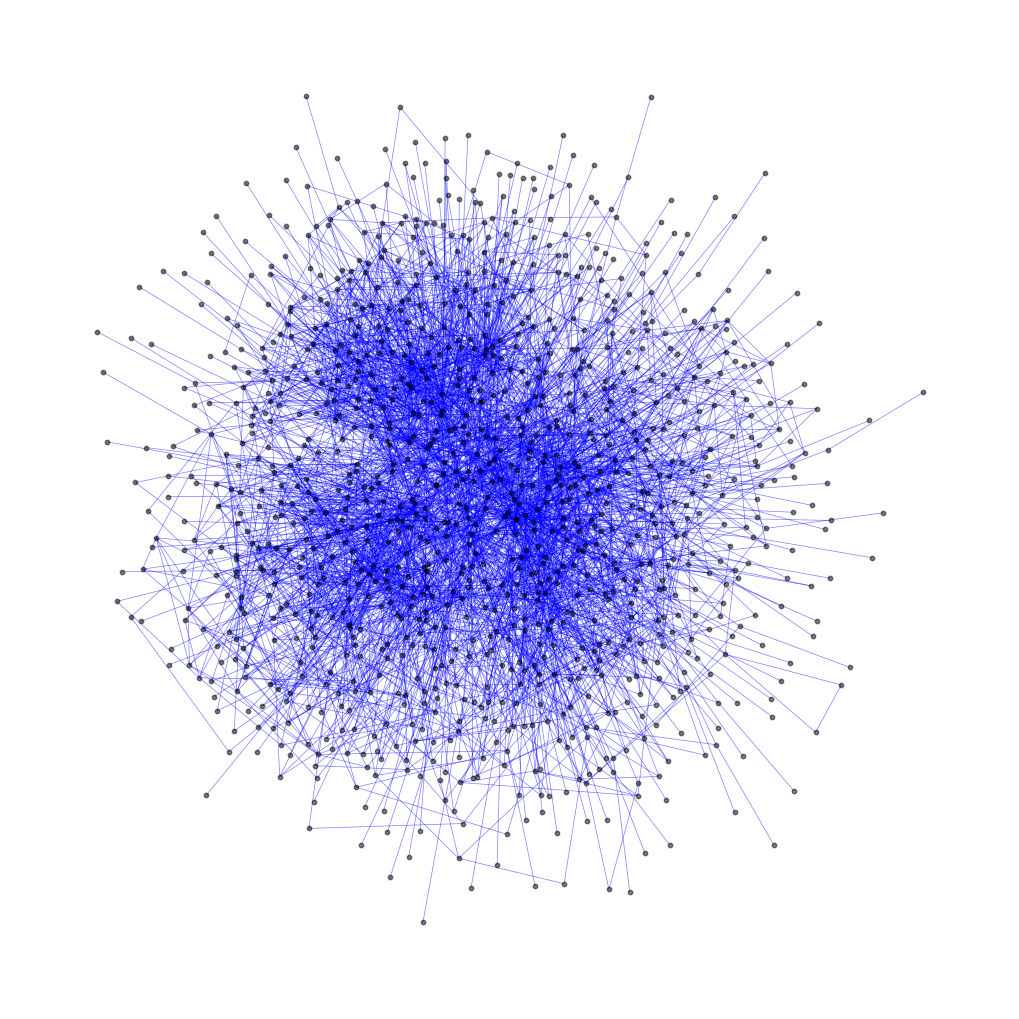

In [70]:
# Network import
G = nx.read_gexf('social_network_training.gexf')
print('Number of Nodes: %i, Number of Edges: %i' % (G.number_of_nodes(), G.number_of_edges()))
fig = plt.figure(figsize=(10, 10))
nx.draw(G,pos=nx.kamada_kawai_layout(G),node_color='black',alpha=0.5,node_size=10,edge_color='blue',width=0.5)


In [81]:
#Link prediction features functions definition
def common_neighbors(G, u, v):
    return len(list(nx.common_neighbors(G, u, v)))

def jaccard_coefficient(G, u, v):
    return list(nx.jaccard_coefficient(G, [(u, v)]))[0][2]

def adamic_adar_index(G, u, v):
    return list(nx.adamic_adar_index(G, [(u, v)]))[0][2]

#Data frame creation with all possible pairs of nodes
pairs = pd.DataFrame(combinations(G.nodes(), 2), columns=['source', 'target'])

#Features calculation
pairs['common_neighbors'] = pairs.apply(lambda x: common_neighbors(G, x['source'], x['target']), axis=1)
pairs['jaccard'] = pairs.apply(lambda x: jaccard_coefficient(G, x['source'], x['target']), axis=1)
pairs['adamic_adar'] = pairs.apply(lambda x: adamic_adar_index(G, x['source'], x['target']), axis=1)

#Label pairs that are actually edges
pairs['link'] = pairs.apply(lambda x: 'linked' if G.has_edge(x['source'], x['target']) else 'not linked', axis=1)
print(pairs.head())

  source target  common_neighbors   jaccard  adamic_adar        link
0      1      2                 8  0.258065     2.991160  not linked
1      1      3                11  0.268293     3.938792  not linked
2      1      4                 2  0.050000     0.787251      linked
3      1      5                 2  0.071429     0.676472      linked
4      1      6                 5  0.147059     1.968217      linked


In [72]:
#Model training

X = pairs[['common_neighbors', 'jaccard', 'adamic_adar']]
y = pairs['link']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)